In [15]:
#konlp
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash
#NPL_ShoppingReview
# 자료 다운로드 주소 : https://github.com/bab2min/corpus/tree/master/sentiment
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
                          filename="naver_shopp_review.txt")


--2025-09-03 00:31:39--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2025-09-03 00:31:40--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fac54e6a05ac205adac3a3b7a.dl.dropboxusercontent.com/cd/0/inline/CwkHBK_SgZTZv89ay_LWKHfRTiBvQoKu7CKSPrMbCjrgsovg0VhQhK7cRIP83fLG8GBxc-5KOibWiltVHPNketXzCfo0y7i6aAcAee5HF6rRGjkwQf9c9akKIkFLOoAl0k-hgqs1tL-DfIpcL6SHVcL-/file?dl=1# [following]
--2025-09-03 00:31:40--  https://uc1

('naver_shopp_review.txt', <http.client.HTTPMessage at 0x7c763d369f70>)

In [16]:
import os
from google.colab import drive
drive.mount('/content/drive')
ROOT_MODEL = f"/drive/MyDrive/CONVLSTM_current/" #구글 드라이브
#구글 드라이브 마운트
if not os.path.exists("."+ROOT_MODEL):
    os.mkdir("./"+ROOT_MODEL)
# 별갯수가 4 이상이면 긍정 리뷰 3이하이면 부정 리뷰 - 이진 분류 모델
import pandas as pd
df = pd.read_table(r"naver_shopp_review.txt",names=["start_count","reviews"])
print(df.info)

Mounted at /content/drive
<bound method DataFrame.info of         start_count                                            reviews
0                 5                                            배공빠르고 굿
1                 2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2                 5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3                 2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                 5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...             ...                                                ...
199995            2                                    장마라그런가!!! 달지않아요
199996            5  다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997            5                    로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998            5                                      넘이쁘고 쎄련되보이네요~
199999            5   아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다

[200000 rows x 2 columns]>


In [17]:
#별점으로 긍정평가와 부정 평가로 분류하는 y_true 정답파일 구성
df["label"]=(df["start_count"]>3)*1
print(df["label"].iloc[:5])

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


In [18]:
#결측치 및 이상데이터
print(df.isna().sum())
print(df.isnull().sum())
#중복된 리뷰가 있는지 검사
print("전체데이터갯수:",len(df["reviews"]),"유니크리뷰의 갯수:",df["reviews"].nunique())
print("중복성 데이터 수량:",len(df["reviews"])-df["reviews"].nunique())
#중복된 데이터 제거
df=df.drop_duplicates(subset=["reviews"])
print("제거후 중복성 데이터 수량:",len(df["reviews"])-df["reviews"].nunique())

start_count    0
reviews        0
label          0
dtype: int64
start_count    0
reviews        0
label          0
dtype: int64
전체데이터갯수: 200000 유니크리뷰의 갯수: 199908
중복성 데이터 수량: 92
제거후 중복성 데이터 수량: 0


In [19]:
#데이터 분할
from sklearn.model_selection import train_test_split
x_dataset,x_testset,y_dataset,y_testset = train_test_split(df["reviews"],df["label"],\
                                                          test_size=0.2,\
                                                          stratify=df["label"],\
                                                            random_state=111)
print(x_dataset.shape)
print(x_testset.shape)
print(y_dataset.shape)
print(y_testset.shape)
print(x_dataset[:3])
print(y_dataset[:3])

(159926,)
(39982,)
(159926,)
(39982,)
89437                   발림이 너무 밀리고 정품 맞나 싶습니다 후기가 좋아서 구입했는데
111561                                       재구매 소화가 잘 됩니다.
3659      우선 하트는 해보지도 못했어요 나가서 하려고 가방에 넣었는데 지네들끼리 어켜서 ㅠ ...
Name: reviews, dtype: object
89437     0
111561    1
3659      0
Name: label, dtype: int64


In [20]:
#y파일이 적절히 분배 되었는지 확인
print((y_dataset>0).sum())
print((y_dataset==0).sum())

79962
79964


In [21]:
#1. 전처리 - 한글 영문 공백을 제외한 모든 문자를 제거  1  3  5 , . ... ^^ ; 등등
#    남겨둘 문장을 정규식으로 표현
import re
reg_txt = "[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z\s]"
print(x_dataset[:5])
x_dataset = x_dataset.replace(reg_txt,"",regex=True)
x_testset = x_testset.replace(reg_txt,"",regex=True)
print(x_dataset[:5])
print(x_dataset.iloc[2])


89437                   발림이 너무 밀리고 정품 맞나 싶습니다 후기가 좋아서 구입했는데
111561                                       재구매 소화가 잘 됩니다.
3659      우선 하트는 해보지도 못했어요 나가서 하려고 가방에 넣었는데 지네들끼리 어켜서 ㅠ ...
11385     어깨패드 필요한 만큼 옷걸이 결합해서도 사용하고 필요없으면 분리도 가능해서 실용적입...
140220                                     맨앞에 찍은게 제일 예뻐요~~
Name: reviews, dtype: object


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1303843583.py:4: SyntaxWarning: invalid escape sequence '\s'
  reg_txt = "[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z\s]"


89437                   발림이 너무 밀리고 정품 맞나 싶습니다 후기가 좋아서 구입했는데
111561                                        재구매 소화가 잘 됩니다
3659      우선 하트는 해보지도 못했어요 나가서 하려고 가방에 넣었는데 지네들끼리 어켜서 ㅠ ...
11385     어깨패드 필요한 만큼 옷걸이 결합해서도 사용하고 필요없으면 분리도 가능해서 실용적입...
140220                                       맨앞에 찍은게 제일 예뻐요
Name: reviews, dtype: object
우선 하트는 해보지도 못했어요 나가서 하려고 가방에 넣었는데 지네들끼리 어켜서 ㅠ 사망하셨네요


In [22]:
#한글 형태소 분류와 단어의 불용어 처리
stop_word=["그","에서","나","에","을","를","다","의","는",\
           "들","은","는","이","가","어요","과","도","하다"]
from konlpy.tag import Okt
from tqdm import tqdm
import numpy
okt = Okt()
x_trainset = []
x_testtmp = []
for doc in tqdm(x_dataset):
    tok = okt.morphs(doc,stem=True)
    tmp = [w for w in tok if not w in stop_word]
    x_trainset.append(tmp)
for doc in tqdm(x_testset):
    tok = okt.morphs(doc,stem=True)
    tmp = [w for w in tok if not w in stop_word]
    x_testtmp.append(tmp)

100%|██████████| 39982/39982 [03:43<00:00, 179.17it/s]


In [23]:
print(len(x_trainset),len(y_dataset))
print(len(x_testtmp),len(y_testset))

159926 159926
39982 39982


In [24]:
#단어 출현 빈도를 계산하여 빈도수가 낮은 단어는 제거
freq_word_cnt = {}
for parr in tqdm(x_trainset):
    for p in parr:
        if p in freq_word_cnt:
            freq_word_cnt[p]+=1
        else : freq_word_cnt[p]=1
freq_word_cnt = sorted(freq_word_cnt.items(),key=lambda data:data[1],reverse=True)
print(freq_word_cnt[:3])
print(freq_word_cnt[-3:])
freq_filter = [item for item in freq_word_cnt if item[1]<=1]
print(len(freq_filter))
print(freq_filter[10:50])
freq_one_filter = [item for item in freq_word_cnt if len(item[0])>=3]
print("세글자의 갯수:",len(freq_one_filter))
# 두글자 이하인 단어는 제거 ( 출현횟수가 낮은 단어중 3글자 이상인 단어만 남겨둠)
freq_word_cnt = [item for item in freq_word_cnt if item[1] >=2 or len(item[0])>=3]
print("단어사전의 갯수(vocabulary size):",len(freq_word_cnt))
VOCAB_SIZE = len(freq_word_cnt)


100%|██████████| 159926/159926 [00:00<00:00, 279772.93it/s]


[('좋다', 48728), ('너무', 23938), ('배송', 22854)]
[('잔기침', 1), ('굳굳귣굿', 1), ('티뷰론', 1)]
19407
[('드므네', 1), ('친부', 1), ('궤양', 1), ('알보', 1), ('잔품', 1), ('중심부', 1), ('봣을떄', 1), ('둘껄', 1), ('후흫', 1), ('버시네', 1), ('낑궈', 1), ('사이비종교', 1), ('놀랫구', 1), ('일요', 1), ('양자', 1), ('처디', 1), ('엋처', 1), ('을지', 1), ('마니파셍노', 1), ('소핫', 1), ('피색', 1), ('형강', 1), ('제관', 1), ('특례병', 1), ('뇄', 1), ('탁실', 1), ('열두시', 1), ('홤', 1), ('커넥티드', 1), ('쥣다', 1), ('뒤일', 1), ('김상태', 1), ('고압', 1), ('본새', 1), ('Perm', 1), ('각고', 1), ('돇', 1), ('캐비넷', 1), ('뎁히겠어', 1), ('간작', 1)]
세글자의 갯수: 17176
단어사전의 갯수(vocabulary size): 29948


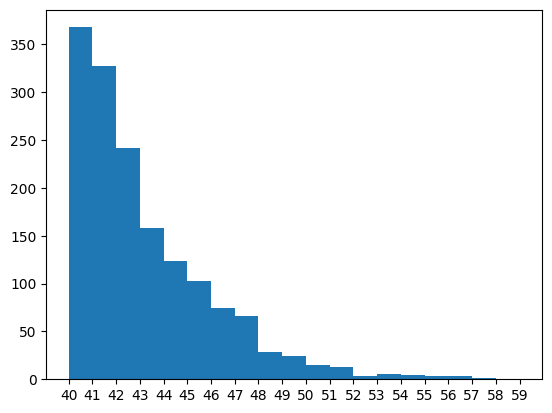

In [25]:
# 문장의 길이 결정
import matplotlib.pyplot as plt
plt.hist([len(x) for x in x_trainset],bins=list(range(40,60)))
plt.xticks(list(range(40,60)))
plt.show()
#분석결과 문장의 길이는 52가 적합
CONTEXT_SIZE = 52

In [26]:
import numpy as np
print(len(x_trainset),len(y_dataset))
print(len(x_testtmp),len(y_testset))

x_train = np.array([" ".join(arr) for arr in x_trainset])
x_test = np.array([" ".join(arr) for arr in x_testset])
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_testset,\
                                                test_size=0.3,\
                                                 stratify=y_testset,\
                                                 random_state=111)
y_train=y_dataset
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)


159926 159926
39982 39982
(159926,) (159926,)
(27987,) (27987,)
(11995,) (11995,)


In [27]:
#문장을 sparse tensor로 변경
import tensorflow as tf
tvc = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE+2,#vocab size
    output_sequence_length=CONTEXT_SIZE,#출력 문장의 길이
)
#마지막 사전 데이터 검증
print("최종 사전의 크기:",VOCAB_SIZE)
print(freq_word_cnt[0])
print(freq_word_cnt[VOCAB_SIZE-5:])
tvc.adapt(x_train)#사전생성
vocab = tvc.get_vocabulary()
print(vocab[:3])
print(vocab[-5:])
print(len(freq_word_cnt))
print(len(vocab))

최종 사전의 크기: 29948
('좋다', 48728)
[('바꿧을텐데', 1), ('안폭신', 1), ('잔기침', 1), ('굳굳귣굿', 1), ('티뷰론', 1)]
['', '[UNK]', np.str_('좋다')]
[np.str_('변치않다'), np.str_('변치'), np.str_('변창'), np.str_('변임'), np.str_('변인')]
29948
29950


In [28]:
# 단어를 단어사전에 의해 정수로 변경
x_train = tvc(x_train)
x_valid = tvc(x_valid)
x_test = tvc(x_test)
print(x_train[:2])
print(x_valid[:2])
print(x_test[:2])

tf.Tensor(
[[1264    3 2516   35  591   60  178  252    2   90    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [  12 4219    9   20    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]], shape=(2, 52), dtype=int64)
tf.Tensor(
[[  142   135  1173   231   116    10   144    35     1   165     5    65
    132  2660     1     1    58     1   335   165     1     1    53     5
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  900  1434  1179   223  4113     1     1     1    88     1   464   125
     21   595

In [29]:
# 주의사항 : embedding 레이어는 모델 내부에 탑재
emb = tf.keras.layers.Embedding(
    VOCAB_SIZE+2,
    8,
    mask_zero=True)

In [30]:
#최종 데이터 모양 확인
#conv 레이어 사용시 맨 마지막 차원의 모양은 1 이여야 합니다.
print("x_train",x_train.shape,"y_train",y_train.shape)
print("x_valid",x_valid.shape,"y_valid",y_valid.shape)
print("x_test",x_test.shape,"y_test",y_test.shape)

x_train (159926, 52) y_train (159926,)
x_valid (27987, 52) y_valid (27987,)
x_test (11995, 52) y_test (11995,)


In [31]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout
import random
tf.random.set_seed(111)
np.random.seed(111)
random.seed(111)

shop_model = Sequential()
shop_model.add(Input((CONTEXT_SIZE,)))
shop_model.add(tf.keras.layers.Reshape((CONTEXT_SIZE,1)))
shop_model.add(emb)
#shop_model.add(tf.keras.layers.Reshape((CONTEXT_SIZE,16,1)))
conv_lstm1 = tf.keras.layers.ConvLSTM1D(
    8,
    3,
    strides=1,
    padding='same',
    dropout=0.8,
    recurrent_dropout=0.8,
    return_sequences=True)
conv_lstm2 = tf.keras.layers.ConvLSTM1D(
    16,
    5,
    strides=2,
    padding='same',
    dropout=0.7,
    recurrent_dropout=0.7,
    return_sequences=False)
shop_model.add(conv_lstm1)
shop_model.add(conv_lstm2)
shop_model.add(Flatten())
shop_model.add(Dropout(0.8))
shop_model.add(Dense(32,"relu"))
shop_model.add(Dropout(0.7))
shop_model.add(Dense(1,"sigmoid"))
adam = tf.keras.optimizers.Adam(learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999)
shop_model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["acc"])


In [32]:
earlyst = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)
fhist = shop_model.fit(x_train,y_train,validation_data=(x_valid,y_valid),
                      epochs=200,batch_size=10000,callbacks=[earlyst])

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - acc: 0.4995 - loss: 0.6933 - val_acc: 0.5011 - val_loss: 0.6931
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 445ms/step - acc: 0.4987 - loss: 0.6933 - val_acc: 0.5002 - val_loss: 0.6931
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - acc: 0.5005 - loss: 0.6931 - val_acc: 0.4982 - val_loss: 0.6931
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - acc: 0.5044 - loss: 0.6932 - val_acc: 0.4945 - val_loss: 0.6931
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - acc: 0.5065 - loss: 0.6931 - val_acc: 0.4986 - val_loss: 0.6931
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - acc: 0.5075 - loss: 0.6931 - val_acc: 0.4999 - val_loss: 0.6931
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - acc: 0.5077 - loss: 0.6930 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 445ms/step - acc: 0.5136 - loss: 0.6930 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 44

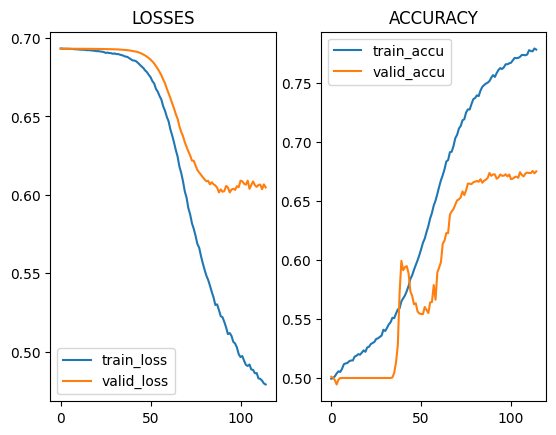

In [33]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(fhist.history["loss"],label="train_loss")
plt.plot(fhist.history["val_loss"],label="valid_loss")
plt.legend()
plt.title("LOSSES")
plt.subplot(1,2,2)
plt.plot(fhist.history["acc"],label="train_accu")
plt.plot(fhist.history["val_acc"],label="valid_accu")
plt.legend()
plt.title("ACCURACY")
plt.show()


In [34]:
loss,acc = shop_model.evaluate(x_test,y_test)
print("최종 손실도:",loss," 최종 정확률",acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - acc: 0.6753 - loss: 0.5966
최종 손실도: 0.5940941572189331  최종 정확률 0.6783660054206848


In [35]:
import sklearn
y_pred = shop_model.predict(x_test)
y_test =y_test.to_numpy()
print(y_pred[0])
print(y_test[0])


375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
[0.34742075]
0


0
0
(11995,)
(11995,)


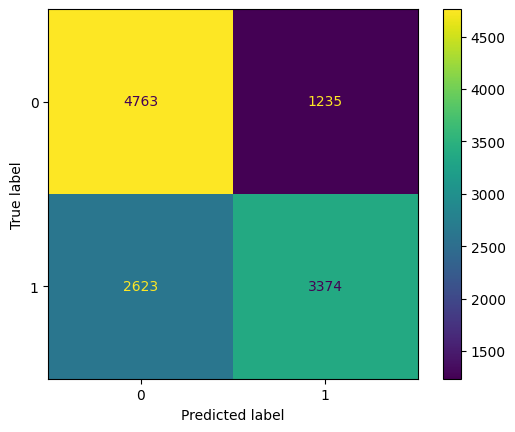

In [36]:
#예측값을 실제 정답 스타일과 일치시켜 혼동 행렬 표기
y_pred_conv = ((y_pred>=0.5)*1).reshape(-1)
print(y_pred_conv[0])
print(y_test[0])
print(y_pred_conv.shape)
print(y_test.shape)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred_conv)
disp = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()
plt.show()

In [37]:
resp = sklearn.metrics.classification_report(y_test, y_pred_conv)
print(resp)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      5998
           1       0.73      0.56      0.64      5997

    accuracy                           0.68     11995
   macro avg       0.69      0.68      0.67     11995
weighted avg       0.69      0.68      0.67     11995



In [38]:

shop_model.save(f"./shopreview_model.keras")
import pickle
conf_data = {"max_len":CONTEXT_SIZE,"voc_len":VOCAB_SIZE+2,"vocab":vocab}
with open(f"./conf_data","wb") as fp:
  pickle.dump(conf_data,fp)



In [39]:
import tensorflow as tf
import pickle
conf_data=None
shop_model = tf.keras.models.load_model(r"./shopreview_model.keras")
with open(f"./conf_data","rb") as fp:
  conf_data=pickle.load(fp)
tvc = tf.keras.layers.TextVectorization(
    max_tokens=conf_data["voc_len"],#vocab size
    output_sequence_length=conf_data["max_len"],#출력 문장의 길이
    vocabulary=conf_data["vocab"]
)
print(shop_model.summary())
print(conf_data["max_len"])
print(conf_data["voc_len"])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 52, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 52, 1, 8)       │       239,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d (ConvLSTM1D)        │ (None, 52, 1, 8)       │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 1, 16)          │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,469 (2.86 MB)

 Trainable params: 249,489 (974.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 498,980 (1.90 MB)

None
52
29950


In [40]:
import numpy as np
import re
from konlpy.tag import Okt
from tqdm import tqdm
user_word = input("상품평을 평가할 문구를 입력하세요")
user_data = np.array([user_word])
#1. 한글 영문 공백을 제외한 모든 문자 제거
reg_txt = r"[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z\s]"
user_data = np.array([re.sub(reg_txt,"",user_data[0])])
#2. 불용어 처리와 한글 형태소 분류
stop_word=["그","에서","나","에","을","를","다","의","는",\
           "들","은","는","이","가","어요","과","도","하다"]
okt = Okt()
x_user = []
print(user_data.shape)
for doc in tqdm(user_data):
    tok = okt.morphs(doc,stem=True)
    tmp = " ".join([w for w in tok if not w in stop_word])
    x_user.append(tmp)
x_user = np.array(x_user)
#3. 정수로 변경
x_user = tvc(x_user)
print(x_user.shape)

상품평을 평가할 문구를 입력하세요이건 상품이 아니에요 질이 좋지 않네요
(1,)


100%|██████████| 1/1 [00:00<00:00, 378.00it/s]

(1, 52)


In [41]:
print(x_user)
y_pred = shop_model.predict(x_user)
print(y_pred)

tf.Tensor(
[[278  61  38 405   2  13   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 52), dtype=int64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.23202534]]
